<h1><center> Delhivery Data Analysis Report</center></h1> 

<p>The company was Founded in 2011, Delhivery stands as India’s leading logistics and supply chain service provider. Offering a comprehensive suite of solutions—from express parcel transportation and warehousing to last-mile delivery—Delhivery leverages advanced technology and a vast delivery network to manage the nationwide movement of goods efficiently. Trusted by businesses of all sizes, Delhivery's commitment to innovation and customer satisfaction has made it the largest fully integrated logistics player in India by revenue in Fiscal 2021. With top-tier infrastructure and cutting-edge data intelligence initiatives led by its Data team, Delhivery aims to revolutionize the commerce operating system in India.</p>

## Features Of the Dataset

| Features | Description |
|----------|-------------|
| data | tells whether the data is testing or training data|
| trip_creation_time | Timestamp of trip creation |
| route_schedule_uuid | Unique Id for a particular route schedule |
| route_type | Transportation type |
| FTL(Full Truck Load) | FTL shipments get to the destination sooner, as the truck is making no other pickups or drop-offs along the way |
| Carting | Handling system consisting of small vehicles (carts) |
| trip_uuid | Unique ID given to a particular trip (A trip may include different source and destination centers) | 
| source_center | Source ID of trip origin |
| source_name | Source Name of trip origin |
| destination_cente | Destination ID |
| destination_name | Destination Name |
| od_start_time | Trip start time |
| od_end_time | Trip end time |
| start_scan_to_end_scan | Time taken to deliver from source to destination |
| is_cutoff | Unknown field |
| cutoff_factor | Unknown field |
| cutoff_timestamp | Unknown field |
| actual_distance_to_destination | Distance in Kms between source and destination warehouse |
| actual_time | Actual time taken to complete the delivery (Cumulative) |
| osrm_time | An open-source routing engine time calculator which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) and gives the time (Cumulative) |
| osrm_distance | An open-source routing engine which computes the shortest path between points in a given map (Includes usual traffic, distance through major and minor roads) (Cumulative) |
| factor | Unknown field |
| segment_actual_time | This is a segment time. Time taken by the subset of the package delivery |
| segment_osrm_time | This is the OSRM segment time. Time taken by the subset of the package delivery |
| segment_osrm_distance | This is the OSRM distance. Distance covered by subset of the package delivery |
| segment_factor | Unknown field |

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Exploratory Data Analysis (EDA)

<p>Exploratory Data Analysis (EDA) is a crucial step in understanding and analyzing the dataset. It involves summarizing the main characteristics of the data, often using visual methods. By performing EDA, we aim to uncover patterns, detect anomalies, and test hypotheses, thus gaining deeper insights into the data.</p>

In [2]:
# creating dataframe
df = pd.read_csv("delhivery_data.csv")
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [3]:
# making a copy of the dataset

df1 = df.copy()
df1.tail()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
144862,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:57:20,45.258278,94.0,60.0,67.9280,1.566667,12.0,12.0,8.1858,1.000000
144863,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:31:18,54.092531,120.0,76.0,85.6829,1.578947,26.0,21.0,17.3725,1.238095
144864,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 21:11:18,66.163591,140.0,88.0,97.0933,1.590909,20.0,34.0,20.7053,0.588235
144865,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 20:53:19,73.680667,158.0,98.0,111.2709,1.612245,17.0,27.0,18.8885,0.629630
144866,training,2018-09-20 16:24:28.436231,thanos::sroute:f0569d2f-4e20-4c31-8542-67b86d5...,Carting,trip-153746066843555182,IND131028AAB,Sonipat_Kundli_H (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-20 16:24:28.436231,...,2018-09-20 16:24:28.436231,70.039010,426.0,95.0,88.7319,4.484211,268.0,9.0,8.8088,29.777778


In [5]:
df1.shape

(144867, 24)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [8]:
df1.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


We will use ``` .describe(include="all") ``` to get the info about the numerical as well as the categorical columns in the dataset

In [9]:
df1.describe(include="all")

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867,144867,144867,144867,144867,144867,144574,144867,144606,144867,...,144867,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
unique,2,14817,1504,2,14817,1508,1498,1481,1468,26369,...,93180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,training,2018-09-22 04:55:04.835022,thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...,FTL,trip-153759210483476123,IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),IND000000ACB,Gurgaon_Bilaspur_HB (Haryana),2018-09-21 18:37:09.322207,...,2018-09-24 05:19:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,104858,101,1812,99660,101,23347,23347,15192,15192,81,...,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000


In [7]:
df1.nunique()

data                                   2
trip_creation_time                 14817
route_schedule_uuid                 1504
route_type                             2
trip_uuid                          14817
source_center                       1508
source_name                         1498
destination_center                  1481
destination_name                    1468
od_start_time                      26369
od_end_time                        26369
start_scan_to_end_scan              1915
is_cutoff                              2
cutoff_factor                        501
cutoff_timestamp                   93180
actual_distance_to_destination    144515
actual_time                         3182
osrm_time                           1531
osrm_distance                     138046
factor                             45641
segment_actual_time                  747
segment_osrm_time                    214
segment_osrm_distance             113799
segment_factor                      5675
dtype: int64

In [8]:
df1.columns.tolist()

['data',
 'trip_creation_time',
 'route_schedule_uuid',
 'route_type',
 'trip_uuid',
 'source_center',
 'source_name',
 'destination_center',
 'destination_name',
 'od_start_time',
 'od_end_time',
 'start_scan_to_end_scan',
 'is_cutoff',
 'cutoff_factor',
 'cutoff_timestamp',
 'actual_distance_to_destination',
 'actual_time',
 'osrm_time',
 'osrm_distance',
 'factor',
 'segment_actual_time',
 'segment_osrm_time',
 'segment_osrm_distance',
 'segment_factor']

### Defining the KPI(Key Performing Indicator)

Key Performance Indicators (KPIs) are metrics that help us to understand how well our logistics operations are performing. Based on the columns we are provided, here are some KPIs and the relevant columns we can use to calculate and visualize them:

- **Delivery Time Performance:** actual_time, osrm_time, segment_actual_time, segment_osrm_time
- **Distance Efficiency:** actual_distance_to_destination, osrm_distance, segment_osrm_distance
- **Cutoff Time Performance:** is_cutoff, cutoff_factor, cutoff_timestamp
- **Operational Efficiency:** factor, segment_factor

### Null detection

In [5]:
# Checking how many null values are their

df1.isnull().sum().sum()

np.int64(554)

So their are only 554 null values in the dataset, Now let's see null values with respect to the columns

In [6]:
df1.isnull().sum()

data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64

In [9]:
# Investigate missing values
missing_percentage = (df[["source_name","destination_name"]].isnull().sum() / len(df)) * 100
print("Percentage of Missing Values:\n", missing_percentage)

Percentage of Missing Values:
 source_name         0.202254
destination_name    0.180165
dtype: float64


Given the low percentage of missing values. We can make 2 approaches here, one is to drop the columns and other is to replace the values with the most frequent value or mode of that column, either approach is acceptable. Imputation with mode is generally preferable as it retains all rows in the dataset, which can be beneficial for analysis. However, if you decide to drop the rows, the impact on your analysis will be minimal due to the small proportion of missing data. Here I am going to replace the null values with the mode value just to retain the rows of the dataset.

In [4]:
# Fill missing values for 'source_name' and 'destination_name' with the mode
df1['source_name'].fillna(df1['source_name'].mode()[0], inplace=True)
df1['destination_name'].fillna(df1['destination_name'].mode()[0], inplace=True)

# Verify that missing values are handled
print("Missing Values after Imputation:\n", df1.isnull().sum())

Missing Values after Imputation:
 data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64


C:\Users\dynam\AppData\Local\Temp\ipykernel_4208\1080222484.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['source_name'].fillna(df1['source_name'].mode()[0], inplace=True)
C:\Users\dynam\AppData\Local\Temp\ipykernel_4208\1080222484.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves 

## Univarate Analysis

We can make graphs related to time, distance as those can be treated as independent column and we will get insights related to delivery time and distace with the osrm i.e system generated time. So let's dive into analysising the time and distance columns.

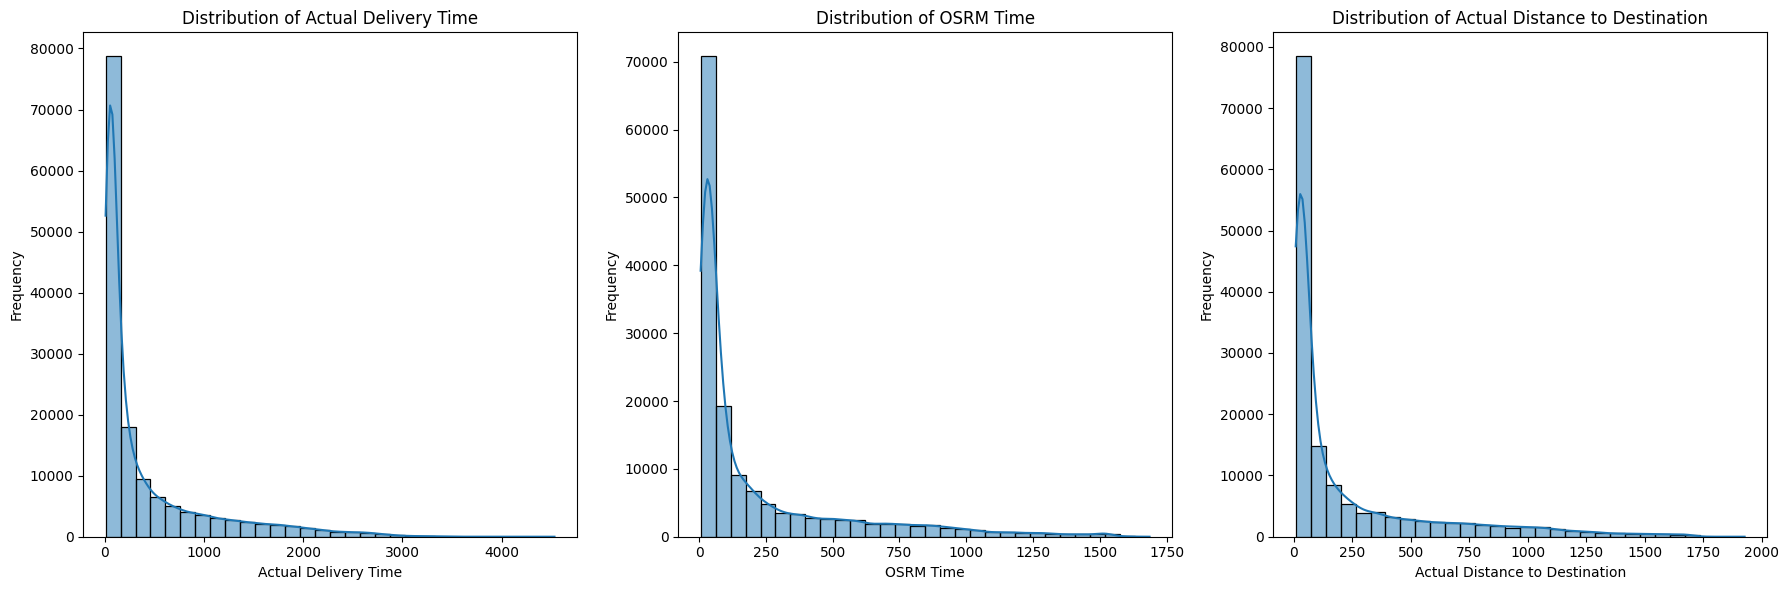

In [5]:
# Create a figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Histogram for actual_time with KDE line in red
sns.histplot(df1['actual_time'], kde=True, bins=30, ax=axes[0], line_kws={'color': 'red'})
axes[0].set_title('Distribution of Actual Delivery Time')
axes[0].set_xlabel('Actual Delivery Time')
axes[0].set_ylabel('Frequency')

# Histogram for osrm_time with KDE line in blue
sns.histplot(df1['osrm_time'], kde=True, bins=30, ax=axes[1], line_kws={'color': 'blue'})
axes[1].set_title('Distribution of OSRM Time')
axes[1].set_xlabel('OSRM Time')
axes[1].set_ylabel('Frequency')

# Histogram for actual_distance_to_destination with KDE line in green
sns.histplot(df1['actual_distance_to_destination'], kde=True, bins=30, ax=axes[2], line_kws={'color': 'green'})
axes[2].set_title('Distribution of Actual Distance to Destination')
axes[2].set_xlabel('Actual Distance to Destination')
axes[2].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


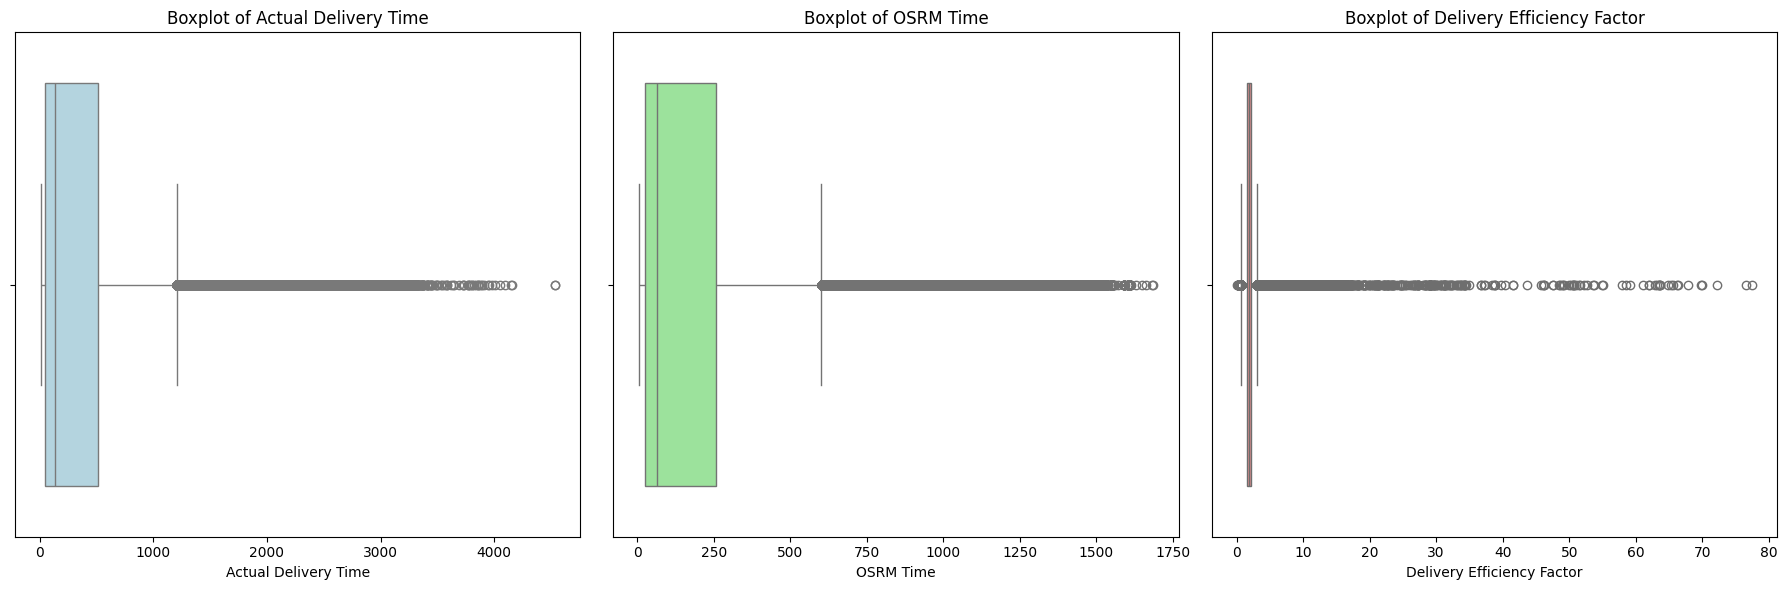

In [6]:
# Create a figure and subplots for box plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Box plot for actual_time
sns.boxplot(x=df1['actual_time'], ax=axes[0], color='lightblue')
axes[0].set_title('Boxplot of Actual Delivery Time')
axes[0].set_xlabel('Actual Delivery Time')

# Box plot for osrm_time
sns.boxplot(x=df1['osrm_time'], ax=axes[1], color='lightgreen')
axes[1].set_title('Boxplot of OSRM Time')
axes[1].set_xlabel('OSRM Time')

# Box plot for factor
sns.boxplot(x=df1['factor'], ax=axes[2], color='lightcoral')
axes[2].set_title('Boxplot of Delivery Efficiency Factor')
axes[2].set_xlabel('Delivery Efficiency Factor')

# Adjust layout
plt.tight_layout()
plt.show()

C:\Users\dynam\AppData\Local\Temp\ipykernel_4208\3411488428.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='route_type', palette='viridis')


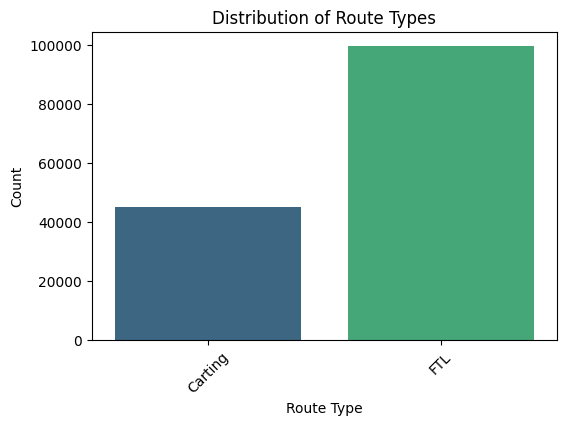

In [7]:
# Bar chart for route_type
plt.figure(figsize=(6, 4))
sns.countplot(data=df1, x='route_type', palette='viridis')
plt.title('Distribution of Route Types')
plt.xlabel('Route Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Finding the No. of deliveries by state,city By Combining the Column and extracting info

In [39]:
df1.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


As we have seen in above column that we don't have state given separately in a different and also the city. So we need to combine some columns and extract the information from it such as city, state of source and destination.

In [9]:
segment_cols = ['segment_actual_time', 'segment_osrm_distance', 'segment_osrm_time']
df1['segment_key'] = df1['trip_uuid'] + '+' + df1['source_center'] + '+' + df1['destination_center']
for col in segment_cols:
   df1[col + '_sum'] = df1.groupby('segment_key')[col].cumsum()
df1[['segment_key', 'segment_actual_time', 'segment_actual_time_sum','segment_osrm_distance', 'segment_osrm_distance_sum','segment_osrm_time', 'segment_osrm_time_sum']].head()

,segment_key,segment_actual_time,segment_actual_time_sum,segment_osrm_distance,segment_osrm_distance_sum,segment_osrm_time,segment_osrm_time_sum
0,trip-153741093647649320+IND388121AAA+IND388620AAB,14.0,14.0,11.9653,11.9653,11.0,11.0
1,trip-153741093647649320+IND388121AAA+IND388620AAB,10.0,24.0,9.7590,21.7243,9.0,20.0
2,trip-153741093647649320+IND388121AAA+IND388620AAB,16.0,40.0,10.8152,32.5395,7.0,27.0
3,trip-153741093647649320+IND388121AAA+IND388620AAB,21.0,61.0,13.0224,45.5619,12.0,39.0
4,trip-153741093647649320+IND388121AAA+IND388620AAB,6.0,67.0,3.9153,49.4772,5.0,44.0


In [11]:
segment_dict = {
  'trip_uuid' : 'first',
  'data': 'first',
  'route_type': 'first',
  'trip_creation_time': 'first',
  'source_name': 'first',
  'destination_name': 'last',
  'od_start_time': 'first',
  'od_end_time': 'last',
  'start_scan_to_end_scan': 'first',
  'actual_distance_to_destination': 'last',
  'actual_time': 'last',
  'osrm_time': 'last',
  'osrm_distance': 'last',
  'segment_actual_time' : 'sum',
  'segment_osrm_time' : 'sum',
  'segment_osrm_distance' : 'sum',
  'segment_actual_time_sum': 'last',
  'segment_osrm_time_sum': 'last',
  'segment_osrm_distance_sum': 'last',
 }
 # Grouping by segment_key and aggregating
segment_agg_data = df1.groupby('segment_key').agg(segment_dict).reset_index()
segment_agg_data = segment_agg_data.sort_values(by=['segment_key','od_end_time'])
segment_agg_data.head()

,segment_key,trip_uuid,data,route_type,trip_creation_time,source_name,destination_name,od_start_time,od_end_time,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_actual_time_sum,segment_osrm_time_sum,segment_osrm_distance_sum
0,trip-153671041653548748+IND209304AAA+IND000000ACB,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Kanpur_Central_H_6 (Uttar Pradesh),Gurgaon_Bilaspur_HB (Haryana),2018-09-12 16:39:46.858469,2018-09-13 13:40:23.123744,1260.0,383.759164,732.0,329.0,446.5496,728.0,534.0,670.6205,728.0,534.0,670.6205
1,trip-153671041653548748+IND462022AAA+IND209304AAA,trip-153671041653548748,training,FTL,2018-09-12 00:00:16.535741,Bhopal_Trnsport_H (Madhya Pradesh),Kanpur_Central_H_6 (Uttar Pradesh),2018-09-12 00:00:16.535741,2018-09-12 16:39:46.858469,999.0,440.973689,830.0,388.0,544.8027,820.0,474.0,649.8528,820.0,474.0,649.8528
2,trip-153671042288605164+IND561203AAB+IND562101AAA,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Doddablpur_ChikaDPP_D (Karnataka),Chikblapur_ShntiSgr_D (Karnataka),2018-09-12 02:03:09.655591,2018-09-12 03:01:59.598855,58.0,24.644021,47.0,26.0,28.1994,46.0,26.0,28.1995,46.0,26.0,28.1995
3,trip-153671042288605164+IND572101AAA+IND561203AAB,trip-153671042288605164,training,Carting,2018-09-12 00:00:22.886430,Tumkur_Veersagr_I (Karnataka),Doddablpur_ChikaDPP_D (Karnataka),2018-09-12 00:00:22.886430,2018-09-12 02:03:09.655591,122.0,48.542890,96.0,42.0,56.9116,95.0,39.0,55.9899,95.0,39.0,55.9899
4,trip-153671043369099517+IND000000ACB+IND160002AAC,trip-153671043369099517,training,FTL,2018-09-12 00:00:33.691250,Gurgaon_Bilaspur_HB (Haryana),Chandigarh_Mehmdpur_H (Punjab),2018-09-14 03:40:17.106733,2018-09-14 17:34:55.442454,834.0,237.439610,611.0,212.0,281.2109,608.0,231.0,317.7408,608.0,231.0,317.7408


In [12]:
df2 = segment_agg_data.copy()

In [13]:
def extract_info(name):
    pattern = r'^(?P<city>[^\s_]+)_?(?P<place>[^\(\)]*)\s?\((?P<state>[A-Za-z\s&]+)\)$'
    match = re.match(pattern, name)
    if match:
        city = match.group('city').strip()
        place = match.group('place').strip() if match.group('place') else city
        state = match.group('state').strip()
        return city, place, state
    else:
        return None, None, None


In [14]:
df2[['source_city', 'source_place', 'source_state']] = df2['source_name'].apply(lambda x: pd.Series(extract_info(x)))

In [15]:
df2[['destination_city', 'destination_place', 'destination_state']] = df2['destination_name'].apply(lambda x: pd.Series(extract_info(x)))

In [16]:
cp = ['gray','red','orange','tomato','yellow','orangered','k','salmon','pink','red','green','tomato','cyan','orangered','k','salmon']

C:\Users\dynam\AppData\Local\Temp\ipykernel_4132\2187177321.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
C:\Users\dynam\AppData\Local\Temp\ipykernel_4132\2187177321.py:4: UserWarning: 
The palette list has fewer values (16) than needed (30) and will cycle, which may produce an uninterpretable plot.
  a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)


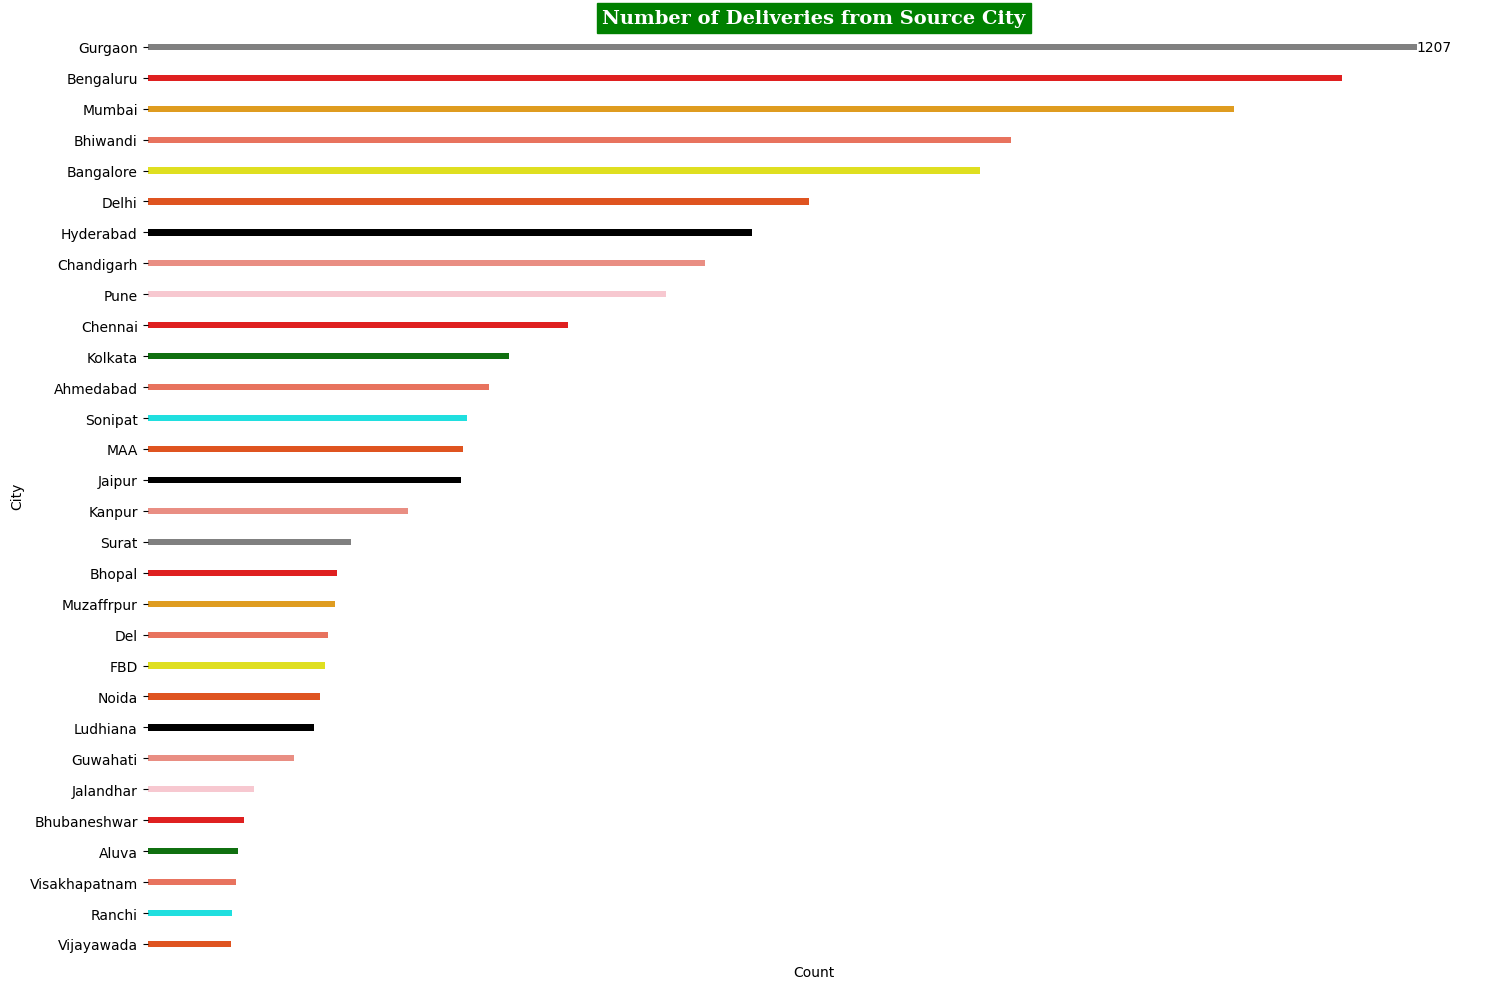

In [51]:
city_counts = df2['source_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

C:\Users\dynam\AppData\Local\Temp\ipykernel_4132\3629664684.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
C:\Users\dynam\AppData\Local\Temp\ipykernel_4132\3629664684.py:4: UserWarning: 
The palette list has fewer values (16) than needed (30) and will cycle, which may produce an uninterpretable plot.
  a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)


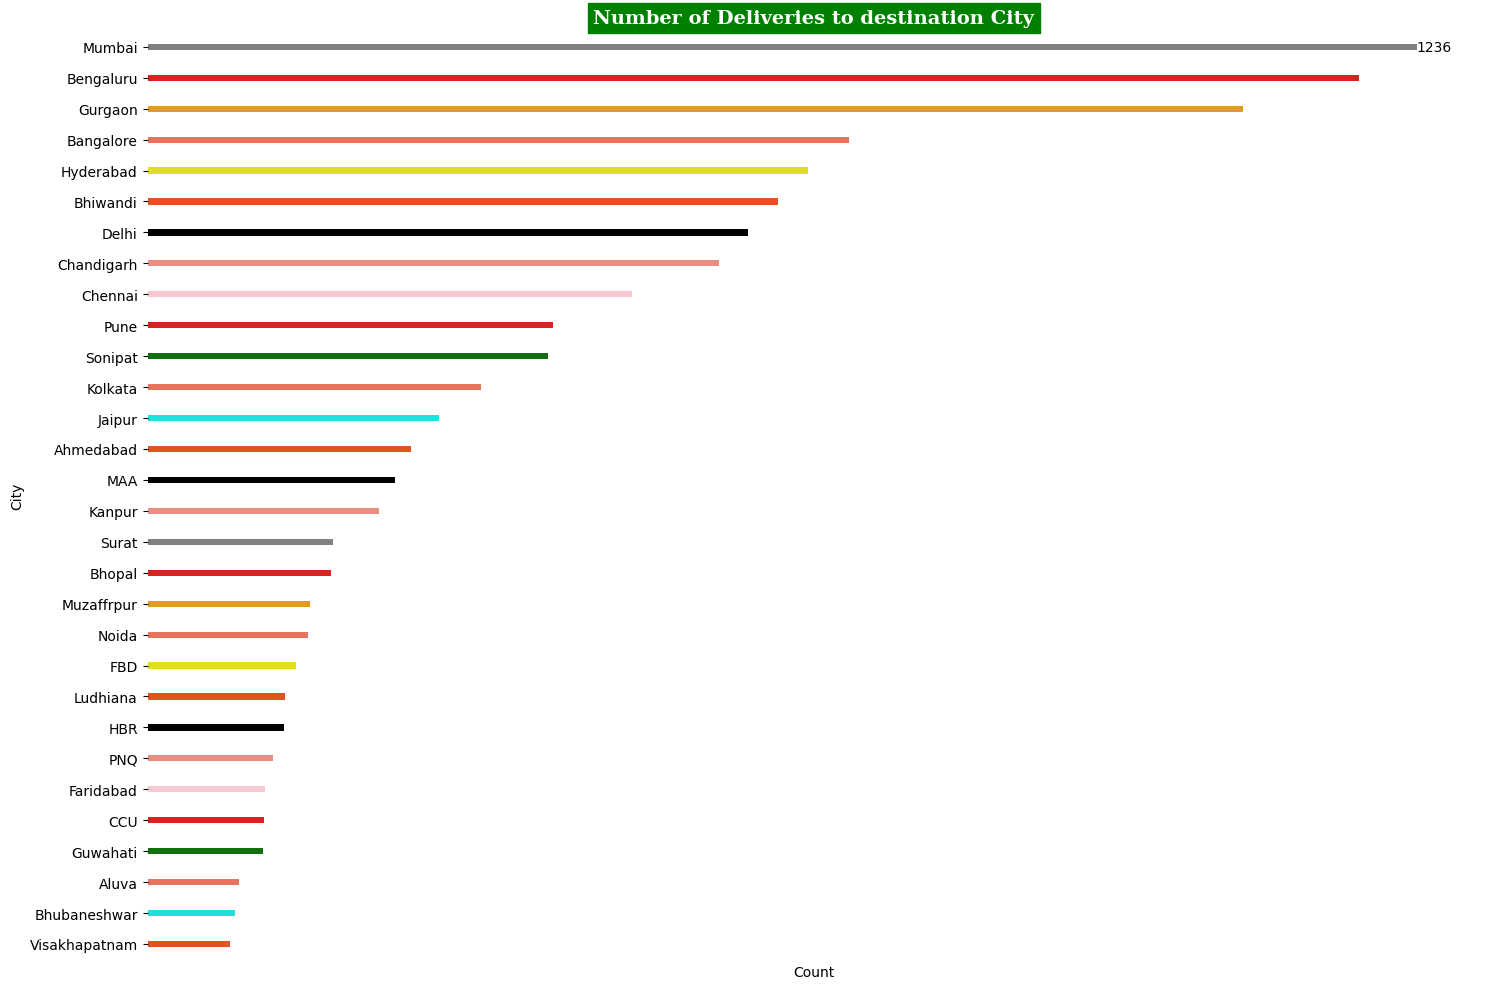

In [53]:
city_counts = df2['destination_city'].value_counts().to_frame().reset_index()[:30]
city_counts.columns = ['City', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='City', x='Count', data=city_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('City')
plt.xlabel('Count')
plt.title('Number of Deliveries to destination City',fontsize=14,fontfamily='serif',fontweight='bold',backgroundcolor='g',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

C:\Users\dynam\AppData\Local\Temp\ipykernel_4132\4092005693.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
C:\Users\dynam\AppData\Local\Temp\ipykernel_4132\4092005693.py:4: UserWarning: 
The palette list has fewer values (16) than needed (31) and will cycle, which may produce an uninterpretable plot.
  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)


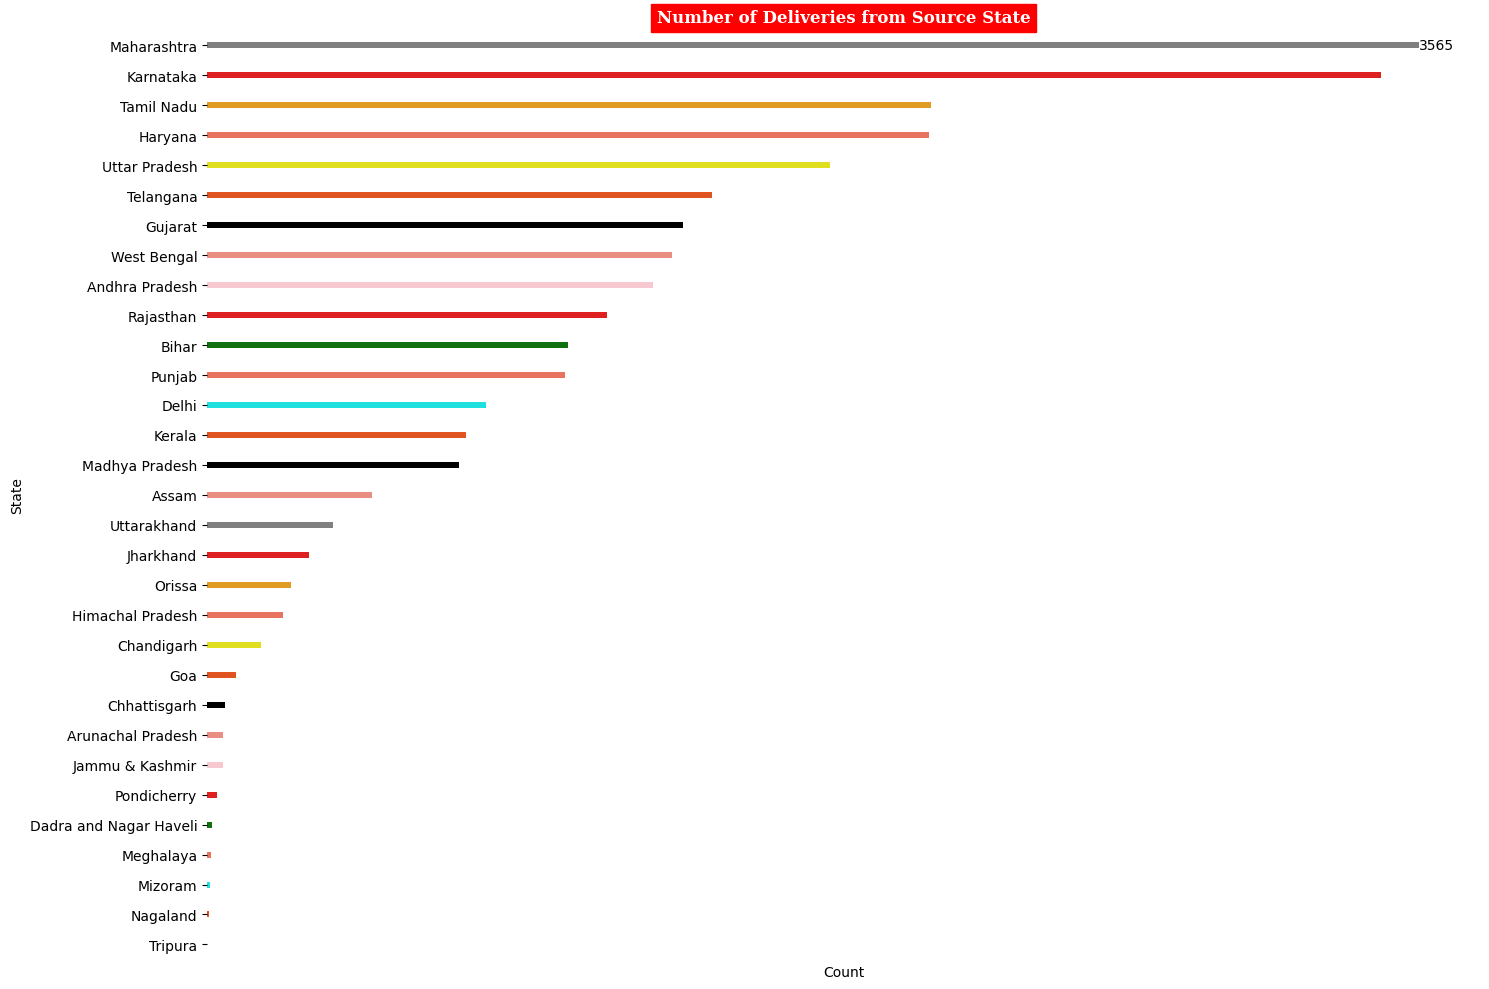

In [55]:
state_counts = df2['source_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries from Source State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='r',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

C:\Users\dynam\AppData\Local\Temp\ipykernel_4208\2016668661.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
C:\Users\dynam\AppData\Local\Temp\ipykernel_4208\2016668661.py:4: UserWarning: 
The palette list has fewer values (16) than needed (32) and will cycle, which may produce an uninterpretable plot.
  a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)


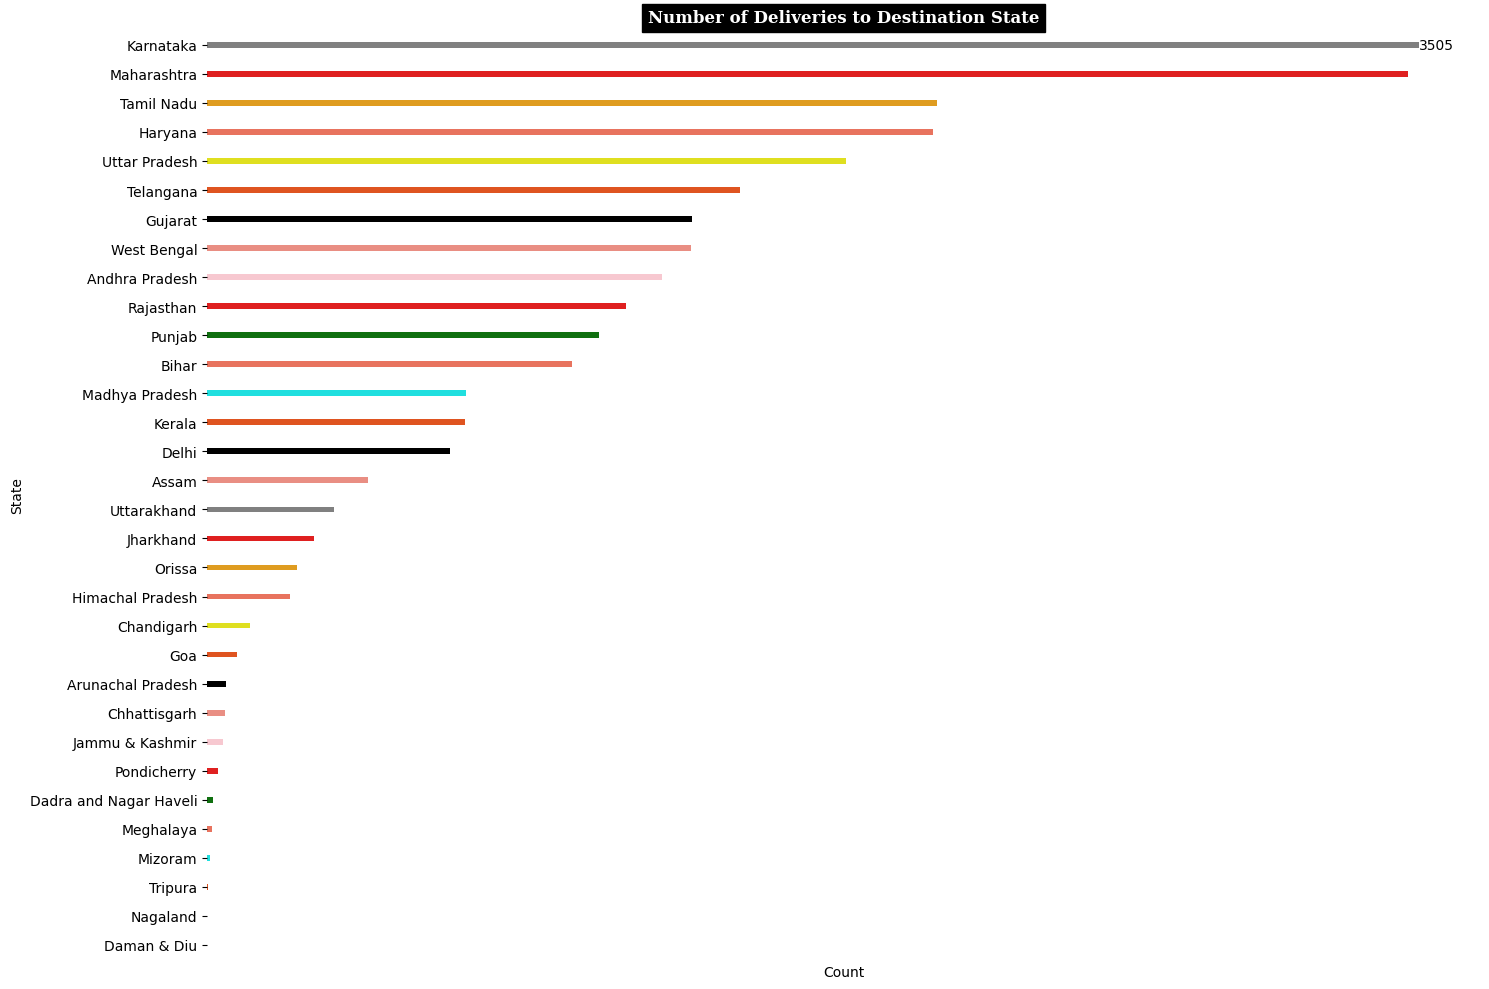

In [18]:
state_counts = df2['destination_state'].value_counts().to_frame().reset_index()
state_counts.columns = ['State', 'Count']
plt.figure(figsize=(15,10))
a = sns.barplot(y='State', x='Count', data=state_counts,palette=cp,width=0.2)
a.bar_label(a.containers[0], label_type='edge')
plt.xticks([])
plt.ylabel('State')
plt.xlabel('Count')
plt.title('Number of Deliveries to Destination State',fontsize=12,fontfamily='serif',fontweight='bold',backgroundcolor='k',color='w')
plt.tight_layout()
sns.despine(bottom=True,left=True)
plt.show()

### Trips created WRT days in month

In [19]:
# Convert trip_creation_time to datetime
df1['trip_creation_time'] = pd.to_datetime(df1['trip_creation_time'])

In [20]:
# Extract day of month and hour from trip_creation_time
df1['day_of_month'] = df1['trip_creation_time'].dt.day
df1['hour_of_day'] = df1['trip_creation_time'].dt.hour

C:\Users\dynam\AppData\Local\Temp\ipykernel_4208\2613689516.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df1, x='day_of_month', palette='viridis')


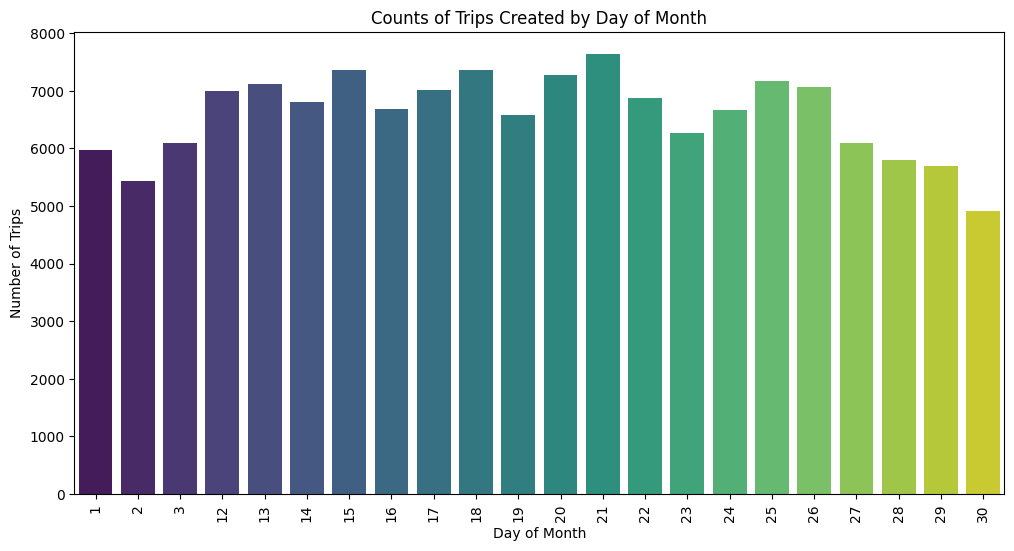

In [22]:
# Plotting the counts of trips created by day of the month
plt.figure(figsize=(12, 6))
sns.countplot(data=df1, x='day_of_month', palette='viridis')
plt.title('Counts of Trips Created by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Trips')
plt.xticks(rotation=90)
plt.show()

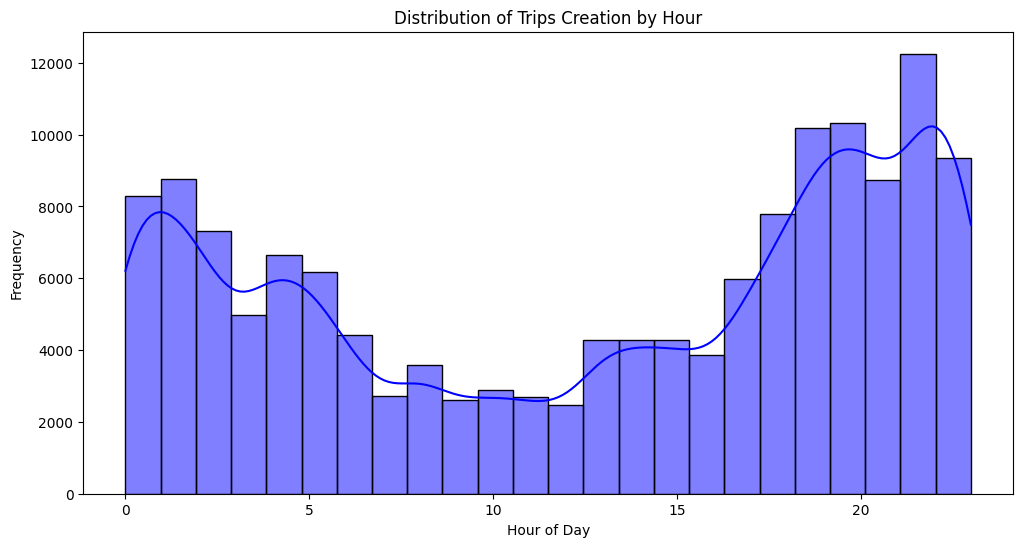

In [23]:
# Plotting the distribution of trips creation by hour
plt.figure(figsize=(12, 6))
sns.histplot(df1['hour_of_day'], bins=24, kde=True, color='blue')
plt.title('Distribution of Trips Creation by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()